In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from modules.csvLoader import csvLoader

%load_ext autoreload
%autoreload 2

## Définition de fonctions utiles

In [2]:
def drop_extreme(df, colonne, low_qt, high_qt):
    limite_basse, limite_haute = df[colonne].quantile([low_qt, high_qt])
    return df.query("{low}<=`{colonne}`<={high}".format(low=limite_basse,high=limite_haute,colonne=colonne))

## Lecture des csv

In [3]:
maison_filtre = csvLoader.load('maison')

Successfully loaded  maison.csv


## Observation sur les types de mutation et leur influence sur la valeur de la maison
```
nb  Vente  :	 489535 	soit	 99.55  % des maisons
nb  Vente en l'état  :	 253 	soit	 0.05  % des maisons
nb  Echange  :	 694 	        soit	 0.14  % des maisons
nb  Adjudication  :	 1124 	soit	 0.23  % des maisons
nb  Vente terrain à  :	 132 	soit	 0.03  % des maisons
nb  Expropriation  :	 10 	soit	 0.0  % des maisons

                                    Valeur fonciere
Nature mutation                                    
Adjudication                              142,767 €
Echange                                   179,116 €
Expropriation                             158,253 €
Vente                                     372,797 €
Vente en l'état futur d'achèvement      2,006,223 €
```

In [4]:
mutations = maison_filtre['Nature mutation'].drop_duplicates().tolist()
for mutation in mutations:
    df = maison_filtre[maison_filtre['Nature mutation']==mutation]
    print('nb ', mutation[:15], ' :\t', len(df), '\tsoit\t', round(len(df)/len(maison_filtre)*100, 2), ' % des maisons' )

del(mutations, df)

print()
print('Valeur moyenne par type de bien')
maison_valeur = maison_filtre[['Nature mutation', 'Valeur fonciere']]
pd.options.display.float_format = '{:,.0f} €'.format
print( maison_valeur.groupby(['Nature mutation']).mean().head() )

del(maison_valeur)

print()
print(len(maison_filtre))
maison_filtre = maison_filtre[maison_filtre['Nature mutation'] == 'Vente']
print(len(maison_filtre))

nb  Vente  :	 489535 	soit	 99.55  % des maisons
nb  Vente en l&#39;état  :	 253 	soit	 0.05  % des maisons
nb  Echange  :	 694 	soit	 0.14  % des maisons
nb  Adjudication  :	 1124 	soit	 0.23  % des maisons
nb  Vente terrain à  :	 132 	soit	 0.03  % des maisons
nb  Expropriation  :	 10 	soit	 0.0  % des maisons

Valeur moyenne par type de bien
                                    Valeur fonciere
Nature mutation                                    
Adjudication                              142,767 €
Echange                                   179,116 €
Expropriation                             158,253 €
Vente                                     372,797 €
Vente en l&#39;état futur d&#39;achèvement      2,006,223 €

491748
489535


## Observation sur le nombre de pièces et nettoyage des extrèmes


In [5]:
if len(maison_filtre) < 465000:
    raise SystemExit("Ce traitement a déjà été effectué !")

print(len(maison_filtre))
maison_filtre = drop_extreme(maison_filtre, 'Nombre pieces principales', 0.1, 0.9)
print(len(maison_filtre))

nb_pieces = maison_filtre['Nombre pieces principales'].drop_duplicates().tolist()
nb_pieces.sort()
df = pd.DataFrame()
for piece in nb_pieces:
    df = maison_filtre[maison_filtre['Nombre pieces principales']==piece]
    print(int(piece), ' pièces :', len(df), '\tsoit\t', round(len(df)/len(maison_filtre)*100, 2), ' % des maisons' )

del(nb_pieces, df)

489535
411491
3  pièces : 92487 	soit	 22.48  % des maisons
4  pièces : 154406 	soit	 37.52  % des maisons
5  pièces : 115475 	soit	 28.06  % des maisons
6  pièces : 49123 	soit	 11.94  % des maisons


In [6]:
if len(maison_filtre) < 400000:
    raise SystemExit("Ce traitement a déjà été effectué !")

print(len(maison_filtre))
maison_filtre = drop_extreme(maison_filtre, 'Valeur fonciere', 0.1, 0.9)
print(len(maison_filtre))

411491
329336


In [7]:
if len(maison_filtre) < 300000:
    raise SystemExit("Ce traitement a déjà été effectué !")

print(len(maison_filtre))
maison_filtre = drop_extreme(maison_filtre, 'Surface terrain', 0.1, 0.9)
print(len(maison_filtre))

329336
263502


## Relation de la taille du terrain (Y) avec le prix (X)

72500 413000 17025
taille du sample :  1318


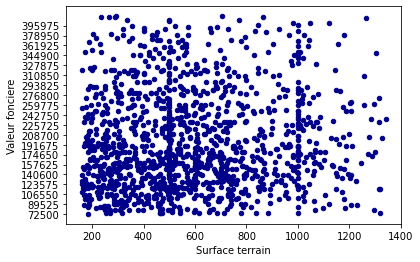

In [22]:
max: int = int(maison_filtre['Valeur fonciere'].max())
min: int = int(maison_filtre['Valeur fonciere'].min())
step: int = round((max - min)/20)
print(min, max, step)

nb_sample = round(0.005*len(maison_filtre))
print('taille du sample : ', nb_sample)
plot = maison_filtre.sample(n=nb_sample).plot.scatter(x='Surface terrain', y='Valeur fonciere', c='DarkBlue', 
    yticks=range(min, max, step))
del(nb_sample, min , max, step)

In [9]:
csvLoader.save(maison_filtre, 'maison_filtre', save_index=False)